In [1]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]
pjr3.py complete


In [ ]:
print ("two vals of pi", np.pi, pi)

$$
f(t) = \Sigma_i (a_i cos({2\pi\over i} t) + b_i sin({2\pi\over i} t)))
$$


In [ ]:
hy2plev?

In [ ]:
plotZMf?

In [ ]:
from nco import Nco

In [ ]:
# identify a model case directory, and a directory to store remapped climo files
import os
#host = os.environ.get('HOST')
#print(host)
#print(os.environ)
import platform
host = platform.node()
print(host)
filename = os.path.expanduser('~/my_folder/output.txt')
if ('corix' in host):
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*-06.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.0049-06.nc'
else:
    indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')
print(indir)
#print('exists',os.path.exists(indir))
DS = xr.open_mfdataset(indir).chunk({'time': 20})
#print(DS)
weights = DS.area
weights.name = 'weights'
print(weights)
print('weights.sum',weights.sum().values,4.*pi)
#Var = DS.FSNT.isel(time=0)
Var = DS.FSNT - DS.FLNT
print(Var.shape)
#Varwt = Var.weighted(weights)
#print(Varwt)
#Varmean = Varwt.mean('ncol')
#print(Varmean)
#Varm2 = Var.weighted(weights).mean('ncol')
Varm2 = Var.weighted(weights).mean()
print('area weighted mean', Varm2.values)

In [ ]:
print(Varm2.values)
Varm2.plot()

In [ ]:
Varm2.shape 
print(Varm2)
#Varm2.compute_chunk_sizes()
Varm2gra = Varm2.rolling(center=True, time=12).mean()
Varm2gra.plot()

In [ ]:
FSNT = DS.FSNT
#FSNTg = FSNT.weighted(weights).mean('ncol')
FSNTg = FSNT.weighted(weights).mean()
FSNTg.plot()

In [ ]:

inCmd='ncdump -v time '+indir+' | grep "time.*="'
outCmd = os.popen(inCmd).read()
print(inCmd)
print(outCmd)

In [ ]:
T = DS.T
print(T)

In [ ]:
#DS = xr.open_dataset('~/NetCDF_Files/vd05_ANN_climo.nc')
#print (DS.T) 
T = DS.T.isel(time=0)
#T?
TZ = T.mean(dim='lon')
#TZ?
lev = TZ['lev']
lat = TZ['lat']
vals = TZ.values
print('plotting on eta levels')
plotZMf(vals, lat, lev)


In [ ]:
# demonstrate shape specification to force correct broadcasting
# add a vector of numbers to a particular axis (in this case axis=1)
pout = np.arange(20)
x = np.zeros([2,20,100])
newshape = [1,20,1]
z = x + pout.reshape(newshape)
print('z shape', z.shape)
print(z[0,:,3])
print(z[1,:,-1])

In [ ]:
# interpolate xarray datavariable on eta hybrid surfaces to pressure

indir = os.path.expanduser('~/NetCDF_Files/*F2010*.nc')
#indir = os.path.expanduser('/lustre/choi040/20210920.F2010.1Nudg.ne30pg2_r05_oECv3/run/20210920.F2010.1Nudg.ne30pg2_r05_oECv3.eam.h2.2015-01-01-00000.nc')
#indir = os.path.expanduser('~/NetCDF_Files/*F2010*01.nc')
#indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')

print(indir)
#print('exists',os.path.exists(indir))
DS = xr.open_mfdataset(indir).chunk({'time': 20})


    
Tin = DS.T
Tin = Tin.squeeze()
#print("Tin",Tin)
Pin = (DS.hyam*DS.P0 + DS.hybm*DS.PS)/100.
Pin.attrs["units"] = 'hPa'
Pin.attrs["long_name"] = 'Pressure'
Pin = Pin.squeeze()
nzout = 20
pout = np.linspace(1.,1000.,nzout)
#pout = [850.]
#pout = 850.
#print ("pout", pout.shape, pout)

Tout = hy2plev(Tin, Pin, pout)


pjr3.py complete
plotting  <xarray.DataArray (ncol: 21600)>
array([285.11100242, 284.29763697, 286.44000716, ..., 265.72855136,
       265.91184516, 266.57738767])
Coordinates:
    time     object 2015-02-01 00:00:00
    plev     float64 850.0
Dimensions without coordinates: ncol
Attributes:
    mdims:          1
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature
    cell_methods:   time: mean


<function matplotlib.pyplot.show(close=None, block=None)>

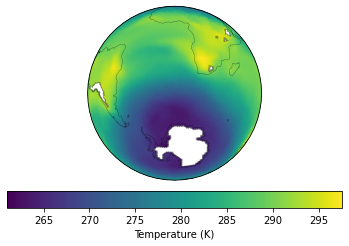

In [49]:
%run -i ~/Python/pjr3
from cartopy import crs

indir = os.path.expanduser('/lustre/choi040/20210920.F2010.1Nudg.ne30pg2_r05_oECv3/run/20210920.F2010.1Nudg.ne30pg2_r05_oECv3.eam.h0.2015-01.nc')
DS = xr.open_mfdataset(indir).chunk({'time': 20})
Tout = DS.PS.isel(time=0)
#indir = os.path.expanduser('/lustre/choi040/20210920.F2010.1Nudg.ne30pg2_r05_oECv3/run/20210920.F2010.1Nudg.ne30pg2_r05_oECv3.eam.h2.2015-01-01-00000.nc')
#DS = xr.open_mfdataset(indir).chunk({'time': 20})
#Tout = DS.T850.isel(time=0)

gridfile = '/lustre/d3x345/maps/ne30pg2_scrip_c20191218.nc'

Tin = DS.T
Tin = Tin.squeeze()
#print("Tin",Tin)
Pin = (DS.hyam*DS.P0 + DS.hybm*DS.PS)/100.
Pin.attrs["units"] = 'hPa'
Pin.attrs["long_name"] = 'Pressure'
Pin = Pin.squeeze()
pout = 850.

Tout2 = hy2plev(Tin, Pin, pout).squeeze()

# Read data
data = Tout2
print('plotting ', data)

lon = DS['lon']
lat = DS['lat']

dataproj=crs.PlateCarree()    # data is always assumed to be lat/lon
plotproj=crs.Orthographic(central_latitude=-50)   # any projections should work 
ax = plt.axes(projection=plotproj)
ax.set_global()
ax.coastlines(linewidth=0.2)

tcoords = plotproj.transform_points(dataproj,np.array(lon[:]),np.array(lat[:]))
data2d = data
xi=tcoords[:,0]!=np.inf
tc=tcoords[xi,:]
datai=data2d[:][xi]  # convert to numpy array, then subset
dmin = datai.min().values
dmax = datai.max().values
pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='gouraud',vmin=dmin,vmax=dmax) # looks good
#pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='flat') # looks bad
# Add colorbar to plot
cb = plt.colorbar(
    pl, orientation='horizontal',
    label='%s (%s)'%(data.long_name, data.units), pad=0.05
)
plt.show

In [48]:
# plot a column specified by xlook and ylook for fields specified on a cubed sphere grid
xlook = 0.
ylook = -90.
lat = DS['lat'].values#[0,:]
#print('latshape',lat.shape)
#print('lat4',lat[0:3])
lon = DS['lon'].values#[0,:]
#print('lon4',lon[0:3])
#print('lat',lat.min(),lat.max())
#print('lon',lon.min(),lon.max())
dist = np.abs(ylook-lat) + np.abs(xlook-lon)
#print('dist',dist)
ind = np.where(dist == np.min(dist))
ind = int(ind[0])
#print('ind',ind, ind.shape, ind[0])
print('ind',ind,lat[ind],lon[ind])
#print('Tout', Tout.shape, Tout.squeeze().shape)
#Toutm = Tout.mean(dim=['ncol','time'])
#Tinm = Tin[0,:,ind]
#print('Tinm',Tinm.values)
#Pinm = Pin[0,:,ind]
#print('Pinm',Pinm.values)
#tind = 0
#for index, item in enumerate(Pinm):
#    print('Pinx ',index, Pinm[index].values, Tinm[index].values)
Toutm = Tout[:,ind]
#print('Toutm',Toutm)
#for index, item in enumerate(Toutm):
#    print('Poutx ',index, pout[index], Toutm[index].values)

Toutm.plot()

ind 16500 -83.20921924057815 6.311501752522137


IndexError: too many indices

In [ ]:
ToutZ = Tout.mean(dim='lon')
lev = ToutZ['plev']
lat = ToutZ['lat']
vals = ToutZ.values
plotZMf(vals, lat, lev)

In [ ]:
da = DS.PS# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() 



da.plot()
plt.show()

In [ ]:
TS = DS.TS# Draw coastlines of the Earth
TS = TS.isel(time=0)
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
lon = TS['lon']
lat = TS['lat']
ax.contourf(lon, lat, TS, transform=ccrs.PlateCarree())

da.plot()
plt.show()

In [ ]:
# fast 1d interpolation of fields along an axis
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as scipy1d

# toy coordinates and data
nx, ny, nz = 25, 30, 10
x = np.arange(nx)
y = np.arange(ny)
z = np.tile(np.arange(nz), (nx,ny,1)) + np.random.randn(nx, ny, nz)*.1
testdata = np.random.randn(nx,ny,nz) # x,y,z

# Desired z-coordinates (must be between bounds of z)
znew = np.tile(np.linspace(2,nz-2,50), (nx,ny,1)) + np.random.randn(nx, ny, 50)*0.01

# Inverse the coordinates for testing
z = z[..., ::-1]
znew = znew[..., ::-1]

# Now use own routine 
ynew = interp_along_axis(testdata, z, znew, axis=2, inverse=True, method='cubic')

# Check some random profiles
for i in range(5):
    randx = np.random.randint(nx)
    randy = np.random.randint(ny)

    checkfunc = scipy1d(z[randx, randy], testdata[randx,randy], kind='cubic')
    checkdata = checkfunc(znew)

    fig, ax = plt.subplots()
    ax.plot(testdata[randx, randy], z[randx, randy], 'x', label='original data')
    ax.plot(checkdata[randx, randy], znew[randx, randy], label='scipy')
    ax.plot(ynew[randx, randy], znew[randx, randy], '--', label='Peter')
    ax.legend()
    plt.show()
